In [3]:
import pandas as pd

# Loading the cleaned Superstore dataset
df = pd.read_csv("/Users/maazhussain/Desktop/Projects/EDA_Superstore/Superstore_Cleaned.csv", parse_dates=['Order Date'])

# Convert Order Date to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Aggregate monthly sales
monthly_sales = df['Sales'].resample('ME').sum()


# View the data
print(monthly_sales.head())


Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: ME, Name: Sales, dtype: float64


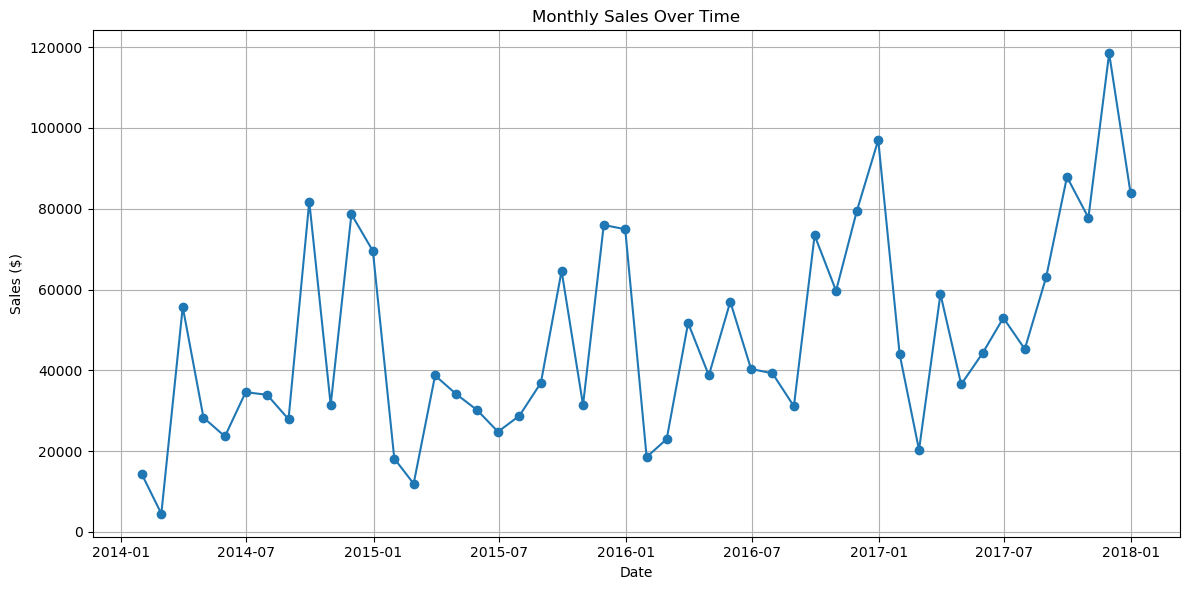

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


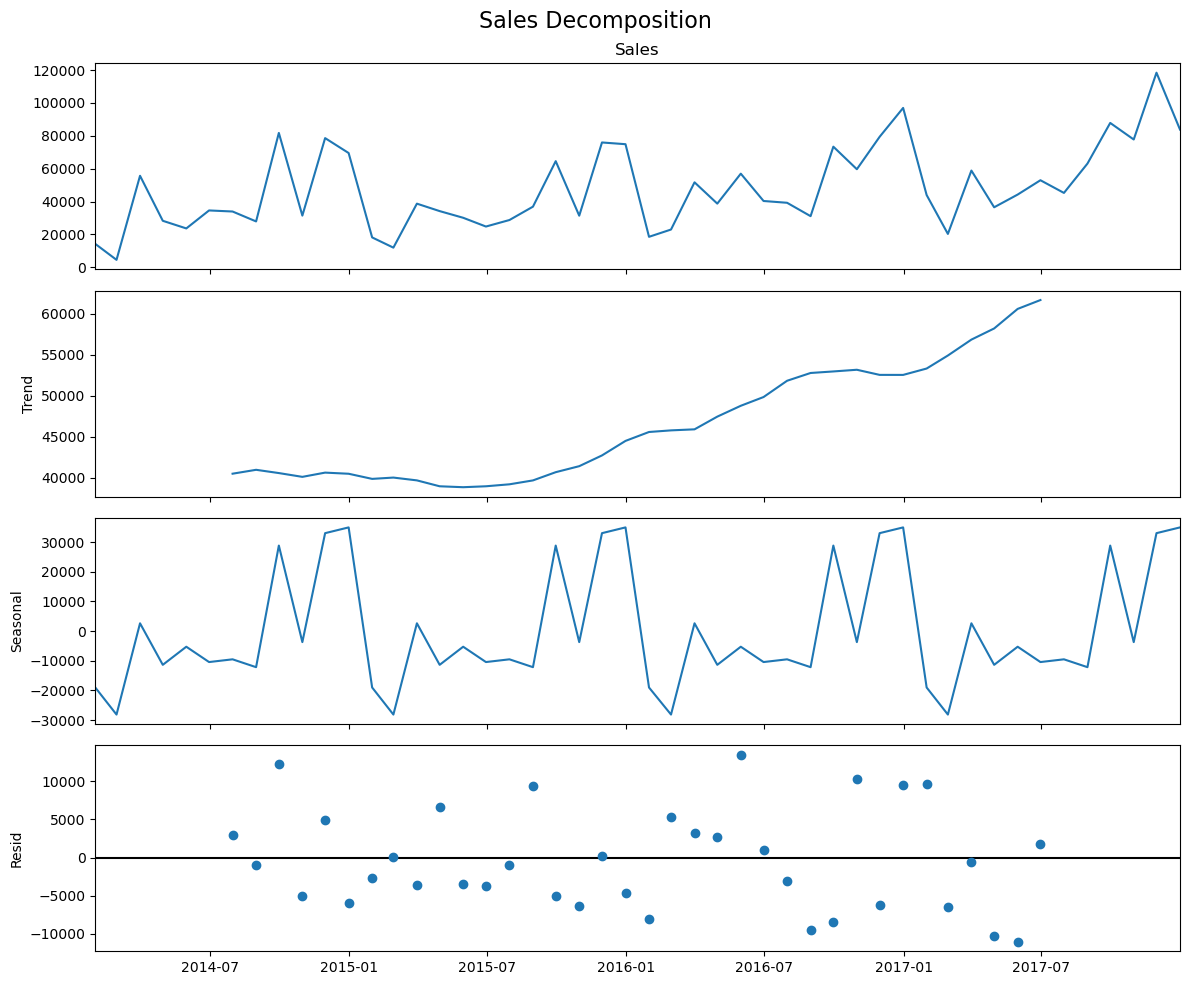

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomp = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot the decomposition
plt.rcParams.update({'figure.figsize': (12, 10)})
decomp.plot()
plt.suptitle('Sales Decomposition', fontsize=16)
plt.tight_layout()
plt.show()


In [15]:
!pip install prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 12.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 11.6 MB/s eta 0:00:00


In [21]:
from prophet import Prophet


In [25]:
# Reset the index and rename columns for Prophet
prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']  # 'ds' = datetime, 'y' = sales

# Check the result
print(prophet_df.head())


          ds          y
0 2014-01-31  14236.895
1 2014-02-28   4519.892
2 2014-03-31  55691.009
3 2014-04-30  28295.345
4 2014-05-31  23648.287


In [27]:
# Initialize the Prophet model
model = Prophet()

# Fit the model to your monthly sales data
model.fit(prophet_df)


12:24:07 - cmdstanpy - INFO - Chain [1] start processing
12:24:08 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# Create a DataFrame for 12 months into the future
future = model.make_future_dataframe(periods=12, freq='ME')

# Forecast future sales
forecast = model.predict(future)

# Preview the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
48,2018-01-31,44491.106008,34764.866586,54134.191653
49,2018-02-28,35661.339165,26508.300994,45447.269821
50,2018-03-31,71959.875166,62966.505930,80937.018669
51,2018-04-30,55942.100032,46897.436801,66261.231412
52,2018-05-31,56193.090655,46921.292093,65934.134932
53,2018-06-30,57388.058290,47887.940557,66087.244889
54,2018-07-31,57316.111004,48139.221771,66184.136886
55,2018-08-31,61936.252857,52456.545850,71826.574968
56,2018-09-30,98895.638706,89322.033833,108617.023879
57,2018-10-31,67553.859076,58398.303369,76451.611001


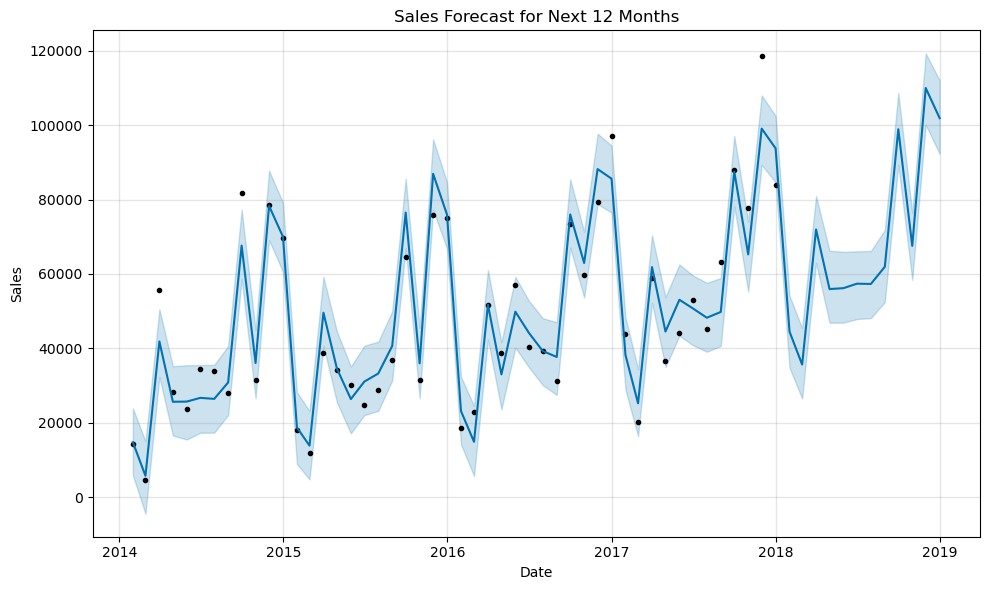

In [35]:
# Plot the forecast
model.plot(forecast)
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


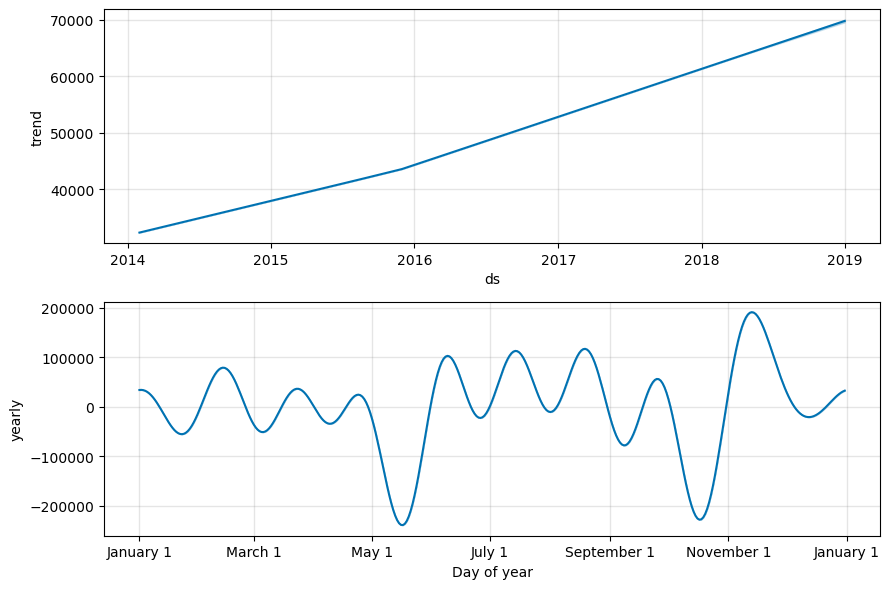

In [37]:
# View trend and seasonality
model.plot_components(forecast)
plt.tight_layout()
plt.show()


# 📊 Sales Forecasting Using Time Series Analysis – Superstore Sales

## 📌 Objective
The goal of this project is to analyze historical monthly sales data and develop a predictive model that forecasts future sales for the next 12 months. This analysis supports informed business planning, inventory management, and financial decision-making.

---

## 🧰 Tools & Libraries Used
- **Python**  
- **Pandas** for data wrangling  
- **Matplotlib** for plotting  
- **Statsmodels** for time series decomposition  
- **Prophet (by Facebook)** for building the forecasting model  

---

## 📈 Key Steps

### ✅ 1. Data Aggregation
- Monthly sales were calculated by resampling the transaction-level dataset using the `Order Date` field.
- Result: A continuous monthly time series of total sales from January 2014 to December 2017.

### ✅ 2. Time Series Visualization
- A line plot was used to visualize overall sales trends and fluctuations over time.
- Clear seasonal spikes and dips were visible, particularly during year-end months.

### ✅ 3. Decomposition
- Applied additive seasonal decomposition (STL) to break down sales into:
  - **Trend:** Long-term growth in sales  
  - **Seasonality:** Repeating monthly patterns  
  - **Residual:** Irregularities and noise

### ✅ 4. Forecasting with Prophet
- Converted the series into Prophet’s required format (`ds` for date, `y` for sales).
- Trained the model on historical data and generated forecasts for the next 12 months.
- Forecast included:
  - `yhat`: Predicted sales
  - `yhat_lower` and `yhat_upper`: 95% confidence interval bounds

---

## 📊 Key Results

| Month       | Forecasted Sales ($) | Confidence Interval (Lower - Upper) |
|-------------|----------------------|--------------------------------------|
| Jan 2018    | 44,491               | 34,765 – 54,134                      |
| Mar 2018    | 71,960               | 62,967 – 80,937                      |
| Jun 2018    | 57,388               | 47,888 – 66,087                      |
| Sep 2018    | 98,896               | 89,322 – 108,617                     |
| Dec 2018    | 101,865              | 92,248 – 112,041                     |

(Full forecast available in the notebook output)

---

## 💡 Business Implications
- **Seasonal Insight:** December and September historically drive high sales — optimal for promotions.
- **Strategic Planning:** Forecast supports quarterly sales targets and stock optimization.
- **Revenue Management:** Helps project cash flow and resource allocation.

---



In [43]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast_output.csv", index=False)
